# XGBOOST 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#Import dataset
df = pd.read_csv (r'ICU.csv')

#Remove feature that does not help prediction
df.drop(['PATIENT_VISIT_IDENTIFIER'],axis=1, inplace=True)

#If a feature has only one value, better of to be removed 
df['WINDOW'].unique()

#To draw the Tree, we need to remove white spaces
df.columns=df.columns.str.replace(' ','_')


df['AGE_PERCENTIL'].unique()

0       60th
1       60th
2       60th
3       60th
4       60th
        ... 
1920    50th
1921    50th
1922    50th
1923    50th
1924    50th
Name: AGE_PERCENTIL, Length: 1925, dtype: object

In [3]:
#Missing Data
#1.Identify missing value
#2. Set them to 0

#1
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

#2
df = df.fillna(0)


#Note: XGBoost only allow int, float, boolean
df.dtypes


#use 0ne-Hot encoding
#onehot=pd.get_dummies(df,columns=['AGE_PERCENTIL'])
df=pd.get_dummies(df)
df.head()

,AGE_ABOVE65,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
#!pip install scikit-learn
#Split dataset into features and label
X, Y = df.iloc[:,:-1], df.iloc[:,-1]

#Splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123, stratify=Y)


In [22]:
#Build A XGBoost Model 
#we could use n_estimators = 10

clf_xgb = xgb.XGBClassifier(objective='binary:logistic',  seed = 42)

In [48]:
#Fit the model
clf_xgb.fit(X_train,y_train,verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.94333
[1]	validation_0-aucpr:0.98532
[2]	validation_0-aucpr:0.98676
[3]	validation_0-aucpr:0.99018
[4]	validation_0-aucpr:0.98974
[5]	validation_0-aucpr:0.99418
[6]	validation_0-aucpr:0.99513
[7]	validation_0-aucpr:0.99630
[8]	validation_0-aucpr:0.99764
[9]	validation_0-aucpr:0.99799
[10]	validation_0-aucpr:0.99799
[11]	validation_0-aucpr:0.99834
[12]	validation_0-aucpr:0.99850
[13]	validation_0-aucpr:0.99899
[14]	validation_0-aucpr:0.99899
[15]	validation_0-aucpr:0.99883
[16]	validation_0-aucpr:0.99916


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.99916
[18]	validation_0-aucpr:0.99933
[19]	validation_0-aucpr:0.99933
[20]	validation_0-aucpr:0.99915
[21]	validation_0-aucpr:0.99933
[22]	validation_0-aucpr:0.99983
[23]	validation_0-aucpr:0.99966
[24]	validation_0-aucpr:0.99983
[25]	validation_0-aucpr:0.99983
[26]	validation_0-aucpr:0.99966
[27]	validation_0-aucpr:0.99966
[28]	validation_0-aucpr:0.99966
[29]	validation_0-aucpr:0.99966
[30]	validation_0-aucpr:0.99949
[31]	validation_0-aucpr:0.99949


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
#Predict the model
ICUs=clf_xgb.predict(X_test)==1

#Find the probability of each class
preds=clf_xgb.predict_proba(X_test)
#First one is probability that the output will be 0 and second one is probability of output being 1.

#sorted(preds[ICUs][:,1],reverse=True)
l1=preds[ICUs][:,1]
index=np.argsort(-np.array(l1), kind='stable')

#WHo needs to be admitted to the ICU in Descending order of priority
X_test.iloc[index]


,AGE_ABOVE65,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,...,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12
617,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1365,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1470,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
450,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
741,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
115,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1872,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1266,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


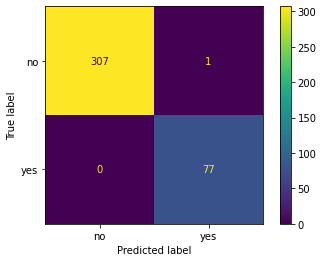

In [80]:
# metrics.confusion_matrix(y_test,clf_xgb.predict(X_test))
metrics.plot_confusion_matrix(clf_xgb,X_test,y_test,
                             display_labels=['no','yes'])

In [91]:
#Inbalance data
#XGBoost has Scale_pose_weight parameter that penalty incorectly classified minority class
#use AUC for evaluation of prediction

#CrossValidation and GridSearch
param_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1],
    'reg_lambda':[0,1,10],
    'scale_pose_weight':[1,3,5]
}

optimal=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                       subsample=0.9),
                           scoring='roc_auc',
                           param_grid=param_grid, 
                           cv=3,
                           verbose=2)
optimal.fit(X_train,y_train)
optimal.best_params_
optimal.score(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[15:34:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:34:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:34:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:34:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:34:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:34:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:34:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:34:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XG

[CV] END gamma=0, learning_rate=0.1, max_depth=5, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:34:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.1, max_depth=5, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:34:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV] END gamma=0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:34:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:34:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:34:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:34:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:34:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:34:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:34:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:34:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:34:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.01, max_depth=5, reg_lambda=0, scale_pose_weight=1; total time=   0.4s
[15:34:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to 

[CV] END gamma=0, learning_rate=0.01, max_depth=5, reg_lambda=1, scale_pose_weight=3; total time=   0.4s
[15:34:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.01, max_depth=5, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:34:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:34:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pose_weight=3; total time=   0.2s
[15:34:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:34:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pose_weight=1; total time=   0.2s
[15:34:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to 

[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:35:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:35:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:35:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:35:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[CV] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pose_weight=5; total time=   0.4s
[15:35:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:35:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10, scale_pose_weight=3; total time=   0.4s
[15:35:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10, scale_pose_weight=5; total time=   0.4s
[15:35:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:35:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:35:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down 

[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:35:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:35:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down

[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:35:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pose_weight=5; total time=   0.5s
[15:35:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down 

[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=0, scale_pose_weight=1; total time=   0.4s
[15:35:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:35:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down 

[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:35:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:35:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down

[CV] END gamma=0.25, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:35:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:35:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

[CV] END gamma=0.25, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:35:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:35:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[CV] END gamma=0.25, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:35:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:35:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

[CV] END gamma=0.25, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:35:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:35:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[CV] END gamma=0.25, learning_rate=0.01, max_depth=5, reg_lambda=1, scale_pose_weight=1; total time=   0.4s
[15:36:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.01, max_depth=5, reg_lambda=1, scale_pose_weight=3; total time=   0.4s
[15:36:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

[CV] END gamma=0.25, learning_rate=0.01, max_depth=5, reg_lambda=10, scale_pose_weight=5; total time=   0.4s
[15:36:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:36:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed do

[CV] END gamma=0.25, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:36:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:36:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

[CV] END gamma=0.25, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:36:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:36:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

[CV] END gamma=0.25, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:36:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:36:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed do

[CV] END gamma=0.25, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pose_weight=3; total time=   0.4s
[15:36:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pose_weight=5; total time=   0.4s
[15:36:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed dow

[CV] END gamma=0.25, learning_rate=0.05, max_depth=5, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:36:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=0.25, learning_rate=0.05, max_depth=5, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:36:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:36:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:36:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:36:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:36:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:36:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:36:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:36:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.1, max_depth=5, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:36:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XG

[CV] END gamma=1, learning_rate=0.1, max_depth=5, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:36:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.1, max_depth=5, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:36:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:37:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pose_weight=3; total time=   0.3s
[15:37:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:37:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:37:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to 

[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pose_weight=3; total time=   0.4s
[15:37:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pose_weight=5; total time=   0.3s
[15:37:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:37:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pose_weight=3; total time=   0.3s
[15:37:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[CV] END gamma=1, learning_rate=0.01, max_depth=5, reg_lambda=0, scale_pose_weight=5; total time=   0.4s
[15:37:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.01, max_depth=5, reg_lambda=1, scale_pose_weight=1; total time=   0.4s
[15:37:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.01, max_depth=5, reg_lambda=10, scale_pose_weight=3; total time=   0.4s
[15:37:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.01, max_depth=5, reg_lambda=10, scale_pose_weight=5; total time=   0.4s
[15:37:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pose_weight=1; total time=   0.3s
[15:37:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:37:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pose_weight=5; total time=   0.3s
[15:37:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pose_weight=1; total time=   0.3s
[15:37:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to 

[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pose_weight=3; total time=   0.3s
[15:37:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pose_weight=5; total time=   0.3s
[15:37:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pose_weight=1; total time=   0.4s
[15:37:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pose_weight=3; total time=   0.4s
[15:37:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

[CV] END gamma=1, learning_rate=0.05, max_depth=5, reg_lambda=1, scale_pose_weight=5; total time=   0.4s
[15:37:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END gamma=1, learning_rate=0.05, max_depth=5, reg_lambda=10, scale_pose_weight=1; total time=   0.3s
[15:37:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1, 10],
                         'scale_pose_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [101]:
#Building the Optimal model
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            seed = 42,
                            gamma= 1,
                            learning_rate= 0.1,
                            max_depth= 3,
                            reg_lambda= 10,
                            scale_pose_weight= 1,
                           subsample=0.9)

#Fit the model
clf_xgb.fit(X_train,y_train,verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[15:54:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "scale_pose_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.92013
[1]	validation_0-aucpr:0.93390
[2]	validation_0-aucpr:0.94674
[3]	validation_0-aucpr:0.94688
[4]	validation_0-aucpr:0.94688
[5]	validation_0-aucpr:0.95227
[6]	validation_0-aucpr:0.95093
[7]	validation_0-aucpr:0.97502
[8]	validation_0-aucpr:0.97824
[9]	validation_0-aucpr:0.97821
[10]	validation_0-aucpr:0.98088
[11]	validation_0-aucpr:0.98075
[12]	validation_0-aucpr:0.98359
[13]	validation_0-aucpr:0.98662
[14]	validation_0-aucpr:0.98796
[15]	validation_0-aucpr:0.99076
[16]	validation_0-aucpr:0.99343
[1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-aucpr:0.99802
[29]	validation_0-aucpr:0.99802
[30]	validation_0-aucpr:0.99802
[31]	validation_0-aucpr:0.99802
[32]	validation_0-aucpr:0.99835
[33]	validation_0-aucpr:0.99818
[34]	validation_0-aucpr:0.99851
[35]	validation_0-aucpr:0.99851
[36]	validation_0-aucpr:0.99851
[37]	validation_0-aucpr:0.99851
[38]	validation_0-aucpr:0.99884
[39]	validation_0-aucpr:0.99901
[40]	validation_0-aucpr:0.99917
[41]	validation_0-aucpr:0.99917
[42]	validation_0-aucpr:0.99917
[43]	validation_0-aucpr:0.99917
[44]	validation_0-aucpr:0.99917
[45]	validation_0-aucpr:0.99917
[46]	validation_0-aucpr:0.99934
[47]	validation_0-aucpr:0.99934
[48]	validation_0-aucpr:0.99934
[49]	validation_0-aucpr:0.99951
[50]	validation_0-aucpr:0.99950
[51]	validation_0-aucpr:0.99967
[52]	validation_0-aucpr:0.99950
[53]	validation_0-aucpr:0.99967
[54]	validation_0-aucpr:0.99967
[55]	validation_0-aucpr:0.99967
[56]	validation_0-aucpr:0.99967
[57]	validation_0-aucpr:0.99967
[58]	validation_0-aucpr:0.99967
[59]	val

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=10, ...)